## Fractal Interpolation

In [9]:
import pandas as pd

In [10]:
google_training_complete = pd.read_csv("Google_Stock_Train (2010-2022).csv")

In [11]:
google_training_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3272 entries, 0 to 3271
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3272 non-null   object 
 1   Open       3272 non-null   float64
 2   High       3272 non-null   float64
 3   Low        3272 non-null   float64
 4   Close      3272 non-null   float64
 5   Adj Close  3272 non-null   float64
 6   Volume     3272 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 179.1+ KB


In [12]:
# Convert 'Date' to datetime
google_training_complete['Date'] = pd.to_datetime(google_training_complete['Date'])

In [14]:
google_training_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3272 entries, 0 to 3271
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3272 non-null   datetime64[ns]
 1   Open       3272 non-null   float64       
 2   High       3272 non-null   float64       
 3   Low        3272 non-null   float64       
 4   Close      3272 non-null   float64       
 5   Adj Close  3272 non-null   float64       
 6   Volume     3272 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 179.1 KB


In [15]:
# Filter for February 2010 and create a copy
google_training_complete_feb_2010 = google_training_complete[
    (google_training_complete['Date'].dt.year == 2010) & 
    (google_training_complete['Date'].dt.month == 2)
].copy()

# Now you can drop columns without warning
google_training_complete_feb_2010.drop(columns=['High', 'Low', 'Adj Close', 'Volume'], inplace=True)

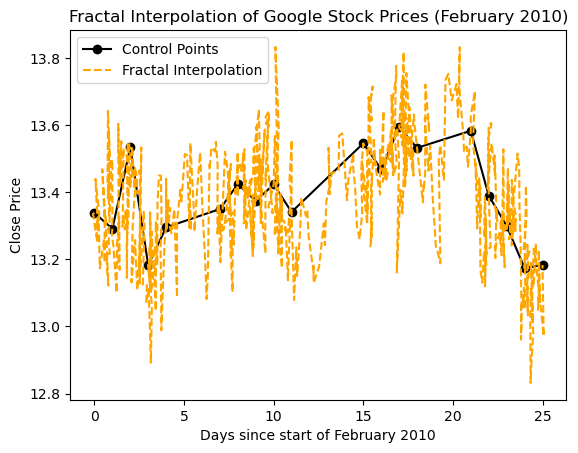

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
google_training_complete = pd.read_csv("Google_Stock_Train (2010-2022).csv")
google_training_complete['Date'] = pd.to_datetime(google_training_complete['Date'])

# Filter for February 2010
google_training_complete_feb_2010 = google_training_complete[
    (google_training_complete['Date'].dt.year == 2010) & 
    (google_training_complete['Date'].dt.month == 2)
]


control_points = google_training_complete_feb_2010[['Date', 'Close']].copy()
control_points['Date'] = (control_points['Date'] - control_points['Date'].min()).dt.days  
"""
Convert to numerical days i.e .dt.days accessor converts this Timedelta into a numerical representation, 
specifically the number of days since the minimum date.
"""

control_points = control_points.to_numpy() # This line converts the control_points DataFrame into a NumPy array.

def fractal_interpolation(control_points, iterations):
    points = np.array(control_points)
    
    for _ in range(iterations):
        new_points = []
        for i in range(len(points) - 1):
            p0 = points[i]
            p1 = points[i + 1]
            
            new_points.append(p0)
            midpoint = (p0 + p1) / 2 + np.random.normal(0, 0.1, size=p0.shape)
            new_points.append(midpoint) 
# np.random.normal(): This is a function from the NumPy library that generates random samples from a normal distribution, where 0 is mean , 0.1 is SD , Wit size as that of P0.       
        new_points.append(points[-1])
        points = np.array(new_points)
    
    return points

# Perform fractal interpolation
iterations = 5
interpolated_points = fractal_interpolation(control_points, iterations)

# Plotting
plt.plot(control_points[:, 0], control_points[:, 1], 'ko-', label='Control Points')  # Black solid line for control points
plt.plot(interpolated_points[:, 0], interpolated_points[:, 1], 'orange', linestyle='--', label='Fractal Interpolation')  # Orange dotted line for interpolation
plt.xlabel('Days since start of February 2010')
plt.ylabel('Close Price')
plt.title('Fractal Interpolation of Google Stock Prices (February 2010)')
plt.legend()
plt.show()

In [23]:
def hurst_exponent(H):
    # Calculate the mean of the time series
    mean = np.mean(H)
    # Calculate the cumulative deviations from the mean
    cum_dev = np.cumsum(H - mean)
    # Calculate R and S
    R = np.max(cum_dev) - np.min(cum_dev)
    S = np.std(H)
    # Calculate the Hurst exponent
    return np.log(R/S) / np.log(len(H))

# Calculate the Hurst exponent for the 'Close' prices
hurst_value = hurst_exponent(control_points[:, 1])   ## calling the function.
print(f'Hurst Exponent: {hurst_value}')

Hurst Exponent: 0.62751771496615


box-counting dimension of a time series compute the fractal dimension based on the counts of boxes needed to cover the data at different sizes

In [30]:
def box_counting_dimension(ts, box_sizes):
    counts = []
    
    for box_size in box_sizes:
        # Count how many boxes of the given size are needed
        count = len(np.unique(np.floor(ts[:, 1] / box_size)))  # Unique y positions in boxes
        counts.append(count)
    
    return counts

# Define box sizes
box_sizes = np.logspace(0.1, 1, num=20)

# Calculate the box counts
box_counts = box_counting_dimension(control_points, box_sizes)

# Fit a line to log(box_sizes) vs log(counts) to find the slope
log_box_sizes = np.log(box_sizes)
log_counts = np.log(box_counts)
slope, intercept = np.polyfit(log_box_sizes, log_counts, 1) ## One represent the degree on polynomial.

# Fractal dimension is the negative of the slope
fractal_dimension = -slope
print(f'Fractal Dimension: {fractal_dimension}')

Fractal Dimension: 0.028669523396569627


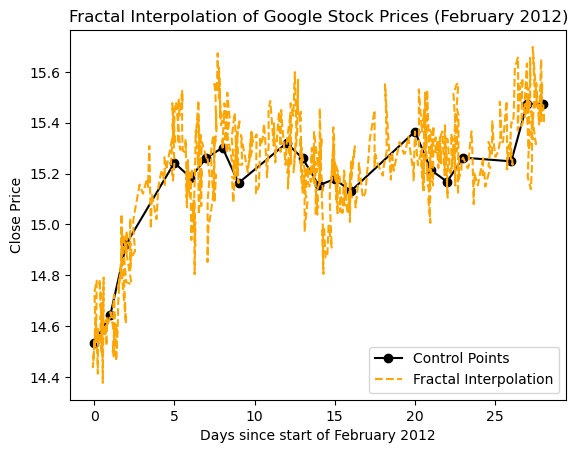

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
google_training_complete = pd.read_csv("Google_Stock_Train (2010-2022).csv")
google_training_complete['Date'] = pd.to_datetime(google_training_complete['Date'])

# Filter for February 2012
google_training_complete_feb_2012 = google_training_complete[
    (google_training_complete['Date'].dt.year == 2012) & 
    (google_training_complete['Date'].dt.month == 2)
]

# Extract control points: Use Date and Close price
control_points = google_training_complete_feb_2012[['Date', 'Close']].copy()
control_points['Date'] = (control_points['Date'] - control_points['Date'].min()).dt.days  # Convert to numerical days

# Convert to numpy array
control_points = control_points.to_numpy()

def fractal_interpolation(control_points, iterations):
    points = np.array(control_points)
    
    for _ in range(iterations):
        new_points = []
        for i in range(len(points) - 1):
            p0 = points[i]
            p1 = points[i + 1]
            
            new_points.append(p0)
            midpoint = (p0 + p1) / 2 + np.random.normal(0, 0.1, size=p0.shape)
            new_points.append(midpoint)
        
        new_points.append(points[-1])
        points = np.array(new_points)
    
    return points

# Perform fractal interpolation
iterations = 5
interpolated_points = fractal_interpolation(control_points, iterations)

# Plotting
plt.plot(control_points[:, 0], control_points[:, 1], 'ko-', label='Control Points')  # Black solid line for control points
plt.plot(interpolated_points[:, 0], interpolated_points[:, 1], 'orange', linestyle='--', label='Fractal Interpolation')  # Orange dotted line for interpolation
plt.xlabel('Days since start of February 2012')
plt.ylabel('Close Price')
plt.title('Fractal Interpolation of Google Stock Prices (February 2012)')
plt.legend()
plt.show()

In [33]:
def hurst_exponent(ts):
    # Calculate the mean of the time series
    mean_ts = np.mean(ts)
    # Calculate the cumulative deviations from the mean
    cum_dev = np.cumsum(ts - mean_ts)
    # Calculate R and S
    R = np.max(cum_dev) - np.min(cum_dev)
    S = np.std(ts)
    # Calculate the Hurst exponent
    return np.log(R/S) / np.log(len(ts))

# Calculate the Hurst exponent for the 'Close' prices
hurst_value = hurst_exponent(control_points[:, 1])
print(f'Hurst Exponent: {hurst_value}')

def box_counting_dimension(ts, box_sizes):
    counts = []
    
    for box_size in box_sizes:
        # Count how many boxes of the given size are needed
        count = len(np.unique(np.floor(ts[:, 1] / box_size)))  # Unique y positions in boxes
        counts.append(count)
    
    return counts

# Define box sizes
box_sizes = np.logspace(0.1, 1, num=20)

# Calculate the box counts
box_counts = box_counting_dimension(control_points, box_sizes)

# Fit a line to log(box_sizes) vs log(counts) to find the slope
log_box_sizes = np.log(box_sizes)
log_counts = np.log(box_counts)
slope, intercept = np.polyfit(log_box_sizes, log_counts, 1)

# Fractal dimension is the negative of the slope
fractal_dimension = -slope
print(f'Fractal Dimension: {fractal_dimension}')

Hurst Exponent: 0.610859274998487
Fractal Dimension: 0.22457793327312892


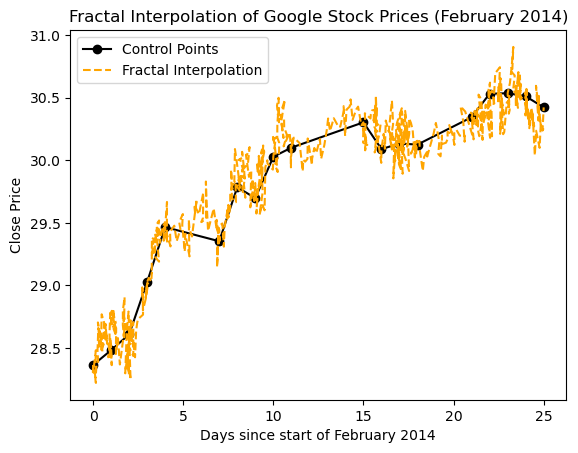

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
google_training_complete = pd.read_csv("Google_Stock_Train (2010-2022).csv")
google_training_complete['Date'] = pd.to_datetime(google_training_complete['Date'])

# Filter for February 2014
google_training_complete_feb_2014 = google_training_complete[
    (google_training_complete['Date'].dt.year == 2014) & 
    (google_training_complete['Date'].dt.month == 2)
]

# Extract control points: Use Date and Close price
control_points = google_training_complete_feb_2014[['Date', 'Close']].copy()
control_points['Date'] = (control_points['Date'] - control_points['Date'].min()).dt.days  # Convert to numerical days

# Convert to numpy array
control_points = control_points.to_numpy()

def fractal_interpolation(control_points, iterations):
    points = np.array(control_points)
    
    for _ in range(iterations):
        new_points = []
        for i in range(len(points) - 1):
            p0 = points[i]
            p1 = points[i + 1]
            
            new_points.append(p0)
            midpoint = (p0 + p1) / 2 + np.random.normal(0, 0.1, size=p0.shape)
            new_points.append(midpoint)
        
        new_points.append(points[-1])
        points = np.array(new_points)
    
    return points

# Perform fractal interpolation
iterations = 5
interpolated_points = fractal_interpolation(control_points, iterations)

# Plotting
plt.plot(control_points[:, 0], control_points[:, 1], 'ko-', label='Control Points')  # Black solid line for control points
plt.plot(interpolated_points[:, 0], interpolated_points[:, 1], 'orange', linestyle='--', label='Fractal Interpolation')  # Orange dotted line for interpolation
plt.xlabel('Days since start of February 2014')
plt.ylabel('Close Price')
plt.title('Fractal Interpolation of Google Stock Prices (February 2014)')
plt.legend()
plt.show()

In [36]:
def hurst_exponent(ts):
    # Calculate the mean of the time series
    mean_ts = np.mean(ts)
    # Calculate the cumulative deviations from the mean
    cum_dev = np.cumsum(ts - mean_ts)
    # Calculate R and S
    R = np.max(cum_dev) - np.min(cum_dev)
    S = np.std(ts)
    # Calculate the Hurst exponent
    return np.log(R/S) / np.log(len(ts))

# Calculate the Hurst exponent for the 'Close' prices
hurst_value = hurst_exponent(control_points[:, 1])
print(f'Hurst Exponent: {hurst_value}')

def box_counting_dimension(ts, box_sizes):
    counts = []
    
    for box_size in box_sizes:
        # Count how many boxes of the given size are needed
        count = len(np.unique(np.floor(ts[:, 1] / box_size)))  # Unique y positions in boxes
        counts.append(count)
    
    return counts

# Define box sizes
box_sizes = np.logspace(0.1, 1, num=20)

# Calculate the box counts
box_counts = box_counting_dimension(control_points, box_sizes)

# Fit a line to log(box_sizes) vs log(counts) to find the slope
log_box_sizes = np.log(box_sizes)
log_counts = np.log(box_counts)
slope, intercept = np.polyfit(log_box_sizes, log_counts, 1)

# Fractal dimension is the negative of the slope
fractal_dimension = -slope
print(f'Fractal Dimension: {fractal_dimension}')

Hurst Exponent: 0.7037030494006588
Fractal Dimension: 0.31591085212026854


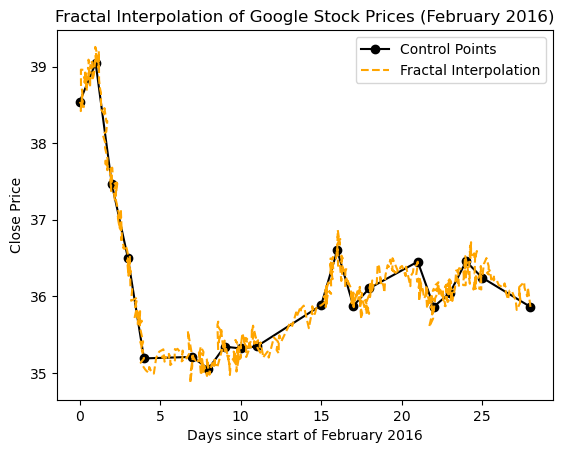

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
google_training_complete = pd.read_csv("Google_Stock_Train (2010-2022).csv")
google_training_complete['Date'] = pd.to_datetime(google_training_complete['Date'])

# Filter for February 2016
google_training_complete_feb_2016 = google_training_complete[
    (google_training_complete['Date'].dt.year == 2016) & 
    (google_training_complete['Date'].dt.month == 2)
]

# Extract control points: Use Date and Close price
control_points = google_training_complete_feb_2016[['Date', 'Close']].copy()
control_points['Date'] = (control_points['Date'] - control_points['Date'].min()).dt.days  # Convert to numerical days

# Convert to numpy array
control_points = control_points.to_numpy()

def fractal_interpolation(control_points, iterations):
    points = np.array(control_points)
    
    for _ in range(iterations):
        new_points = []
        for i in range(len(points) - 1):
            p0 = points[i]
            p1 = points[i + 1]
            
            new_points.append(p0)
            midpoint = (p0 + p1) / 2 + np.random.normal(0, 0.1, size=p0.shape)
            new_points.append(midpoint)
        
        new_points.append(points[-1])
        points = np.array(new_points)
    
    return points

# Perform fractal interpolation
iterations = 5
interpolated_points = fractal_interpolation(control_points, iterations)

# Plotting
plt.plot(control_points[:, 0], control_points[:, 1], 'ko-', label='Control Points')  # Black solid line for control points
plt.plot(interpolated_points[:, 0], interpolated_points[:, 1], 'orange', linestyle='--', label='Fractal Interpolation')  # Orange dotted line for interpolation
plt.xlabel('Days since start of February 2016')
plt.ylabel('Close Price')
plt.title('Fractal Interpolation of Google Stock Prices (February 2016)')
plt.legend()
plt.show()

In [38]:
def hurst_exponent(ts):
    # Calculate the mean of the time series
    mean_ts = np.mean(ts)
    # Calculate the cumulative deviations from the mean
    cum_dev = np.cumsum(ts - mean_ts)
    # Calculate R and S
    R = np.max(cum_dev) - np.min(cum_dev)
    S = np.std(ts)
    # Calculate the Hurst exponent
    return np.log(R/S) / np.log(len(ts))

# Calculate the Hurst exponent for the 'Close' prices
hurst_value = hurst_exponent(control_points[:, 1])
print(f'Hurst Exponent: {hurst_value}')

def box_counting_dimension(ts, box_sizes):
    counts = []
    
    for box_size in box_sizes:
        # Count how many boxes of the given size are needed
        count = len(np.unique(np.floor(ts[:, 1] / box_size)))  # Unique y positions in boxes
        counts.append(count)
    
    return counts

# Define box sizes
box_sizes = np.logspace(0.1, 1, num=20)

# Calculate the box counts
box_counts = box_counting_dimension(control_points, box_sizes)

# Fit a line to log(box_sizes) vs log(counts) to find the slope
log_box_sizes = np.log(box_sizes)
log_counts = np.log(box_counts)
slope, intercept = np.polyfit(log_box_sizes, log_counts, 1)

# Fractal dimension is the negative of the slope
fractal_dimension = -slope
print(f'Fractal Dimension: {fractal_dimension}')

Hurst Exponent: 0.6210028098075681
Fractal Dimension: 0.5710736542720417


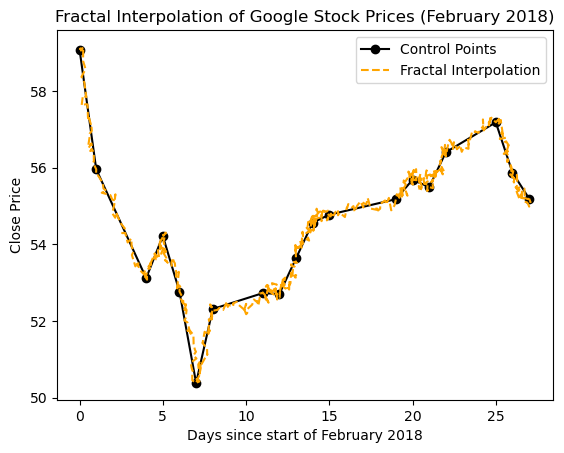

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
google_training_complete = pd.read_csv("Google_Stock_Train (2010-2022).csv")
google_training_complete['Date'] = pd.to_datetime(google_training_complete['Date'])

# Filter for February 2018
google_training_complete_feb_2018 = google_training_complete[
    (google_training_complete['Date'].dt.year == 2018) & 
    (google_training_complete['Date'].dt.month == 2)
]

# Extract control points: Use Date and Close price
control_points = google_training_complete_feb_2018[['Date', 'Close']].copy()
control_points['Date'] = (control_points['Date'] - control_points['Date'].min()).dt.days  # Convert to numerical days

# Convert to numpy array
control_points = control_points.to_numpy()

def fractal_interpolation(control_points, iterations):
    points = np.array(control_points)
    
    for _ in range(iterations):
        new_points = []
        for i in range(len(points) - 1):
            p0 = points[i]
            p1 = points[i + 1]
            
            new_points.append(p0)
            midpoint = (p0 + p1) / 2 + np.random.normal(0, 0.1, size=p0.shape)
            new_points.append(midpoint)
        
        new_points.append(points[-1])
        points = np.array(new_points)
    
    return points

# Perform fractal interpolation
iterations = 5
interpolated_points = fractal_interpolation(control_points, iterations)

# Plotting
plt.plot(control_points[:, 0], control_points[:, 1], 'ko-', label='Control Points')  # Black solid line for control points
plt.plot(interpolated_points[:, 0], interpolated_points[:, 1], 'orange', linestyle='--', label='Fractal Interpolation')  # Orange dotted line for interpolation
plt.xlabel('Days since start of February 2018')
plt.ylabel('Close Price')
plt.title('Fractal Interpolation of Google Stock Prices (February 2018)')
plt.legend()
plt.show()

In [40]:
def hurst_exponent(ts):
    # Calculate the mean of the time series
    mean_ts = np.mean(ts)
    # Calculate the cumulative deviations from the mean
    cum_dev = np.cumsum(ts - mean_ts)
    # Calculate R and S
    R = np.max(cum_dev) - np.min(cum_dev)
    S = np.std(ts)
    # Calculate the Hurst exponent
    return np.log(R/S) / np.log(len(ts))

# Calculate the Hurst exponent for the 'Close' prices
hurst_value = hurst_exponent(control_points[:, 1])
print(f'Hurst Exponent: {hurst_value}')

def box_counting_dimension(ts, box_sizes):
    counts = []
    
    for box_size in box_sizes:
        # Count how many boxes of the given size are needed
        count = len(np.unique(np.floor(ts[:, 1] / box_size)))  # Unique y positions in boxes
        counts.append(count)
    
    return counts

# Define box sizes
box_sizes = np.logspace(0.1, 1, num=20)

# Calculate the box counts
box_counts = box_counting_dimension(control_points, box_sizes)

# Fit a line to log(box_sizes) vs log(counts) to find the slope
log_box_sizes = np.log(box_sizes)
log_counts = np.log(box_counts)
slope, intercept = np.polyfit(log_box_sizes, log_counts, 1)

# Fractal dimension is the negative of the slope
fractal_dimension = -slope
print(f'Fractal Dimension: {fractal_dimension}')

Hurst Exponent: 0.6891024908285897
Fractal Dimension: 0.6860871655646356


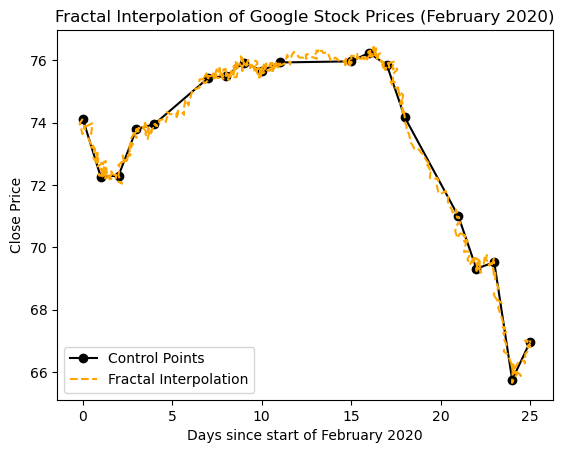

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
google_training_complete = pd.read_csv("Google_Stock_Train (2010-2022).csv")
google_training_complete['Date'] = pd.to_datetime(google_training_complete['Date'])

# Filter for February 2020
google_training_complete_feb_2020 = google_training_complete[
    (google_training_complete['Date'].dt.year == 2020) & 
    (google_training_complete['Date'].dt.month == 2)
]

# Extract control points: Use Date and Close price
control_points = google_training_complete_feb_2020[['Date', 'Close']].copy()
control_points['Date'] = (control_points['Date'] - control_points['Date'].min()).dt.days  # Convert to numerical days

# Convert to numpy array
control_points = control_points.to_numpy()

def fractal_interpolation(control_points, iterations):
    points = np.array(control_points)
    
    for _ in range(iterations):
        new_points = []
        for i in range(len(points) - 1):
            p0 = points[i]
            p1 = points[i + 1]
            
            new_points.append(p0)
            midpoint = (p0 + p1) / 2 + np.random.normal(0, 0.1, size=p0.shape)
            new_points.append(midpoint)
        
        new_points.append(points[-1])
        points = np.array(new_points)
    
    return points

# Perform fractal interpolation
iterations = 5
interpolated_points = fractal_interpolation(control_points, iterations)

# Plotting
plt.plot(control_points[:, 0], control_points[:, 1], 'ko-', label='Control Points')  # Black solid line for control points
plt.plot(interpolated_points[:, 0], interpolated_points[:, 1], 'orange', linestyle='--', label='Fractal Interpolation')  # Orange dotted line for interpolation
plt.xlabel('Days since start of February 2020')
plt.ylabel('Close Price')
plt.title('Fractal Interpolation of Google Stock Prices (February 2020)')
plt.legend()
plt.show()

In [42]:
def hurst_exponent(ts):
    # Calculate the mean of the time series
    mean_ts = np.mean(ts)
    # Calculate the cumulative deviations from the mean
    cum_dev = np.cumsum(ts - mean_ts)
    # Calculate R and S
    R = np.max(cum_dev) - np.min(cum_dev)
    S = np.std(ts)
    # Calculate the Hurst exponent
    return np.log(R/S) / np.log(len(ts))

# Calculate the Hurst exponent for the 'Close' prices
hurst_value = hurst_exponent(control_points[:, 1])
print(f'Hurst Exponent: {hurst_value}')

def box_counting_dimension(ts, box_sizes):
    counts = []
    
    for box_size in box_sizes:
        # Count how many boxes of the given size are needed
        count = len(np.unique(np.floor(ts[:, 1] / box_size)))  # Unique y positions in boxes
        counts.append(count)
    
    return counts

# Define box sizes
box_sizes = np.logspace(0.1, 1, num=20)

# Calculate the box counts
box_counts = box_counting_dimension(control_points, box_sizes)

# Fit a line to log(box_sizes) vs log(counts) to find the slope
log_box_sizes = np.log(box_sizes)
log_counts = np.log(box_counts)
slope, intercept = np.polyfit(log_box_sizes, log_counts, 1)

# Fractal dimension is the negative of the slope
fractal_dimension = -slope
print(f'Fractal Dimension: {fractal_dimension}')

Hurst Exponent: 0.6890444520871996
Fractal Dimension: 0.7707142605216456


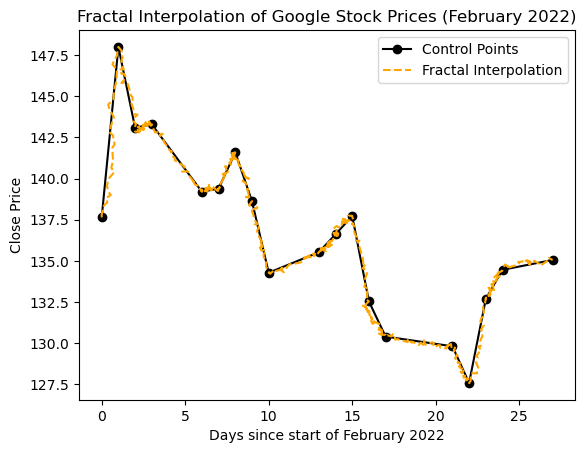

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
google_training_complete = pd.read_csv("Google_Stock_Train (2010-2022).csv")
google_training_complete['Date'] = pd.to_datetime(google_training_complete['Date'])

# Filter for February 2022
google_training_complete_feb_2022 = google_training_complete[
    (google_training_complete['Date'].dt.year == 2022) & 
    (google_training_complete['Date'].dt.month == 2)
]

# Extract control points: Use Date and Close price
control_points = google_training_complete_feb_2022[['Date', 'Close']].copy()
control_points['Date'] = (control_points['Date'] - control_points['Date'].min()).dt.days  # Convert to numerical days

# Convert to numpy array
control_points = control_points.to_numpy()

def fractal_interpolation(control_points, iterations):
    points = np.array(control_points)
    
    for _ in range(iterations):
        new_points = []
        for i in range(len(points) - 1):
            p0 = points[i]
            p1 = points[i + 1]
            
            new_points.append(p0)
            midpoint = (p0 + p1) / 2 + np.random.normal(0, 0.1, size=p0.shape)
            new_points.append(midpoint)
        
        new_points.append(points[-1])
        points = np.array(new_points)
    
    return points

# Perform fractal interpolation
iterations = 5
interpolated_points = fractal_interpolation(control_points, iterations)

# Plotting
plt.plot(control_points[:, 0], control_points[:, 1], 'ko-', label='Control Points')  # Black solid line for control points
plt.plot(interpolated_points[:, 0], interpolated_points[:, 1], 'orange', linestyle='--', label='Fractal Interpolation')  # Orange dotted line for interpolation
plt.xlabel('Days since start of February 2022')
plt.ylabel('Close Price')
plt.title('Fractal Interpolation of Google Stock Prices (February 2022)')
plt.legend()
plt.show()

In [44]:
def hurst_exponent(ts):
    # Calculate the mean of the time series
    mean_ts = np.mean(ts)
    # Calculate the cumulative deviations from the mean
    cum_dev = np.cumsum(ts - mean_ts)
    # Calculate R and S
    R = np.max(cum_dev) - np.min(cum_dev)
    S = np.std(ts)
    # Calculate the Hurst exponent
    return np.log(R/S) / np.log(len(ts))

# Calculate the Hurst exponent for the 'Close' prices
hurst_value = hurst_exponent(control_points[:, 1])
print(f'Hurst Exponent: {hurst_value}')

def box_counting_dimension(ts, box_sizes):
    counts = []
    
    for box_size in box_sizes:
        # Count how many boxes of the given size are needed
        count = len(np.unique(np.floor(ts[:, 1] / box_size)))  # Unique y positions in boxes
        counts.append(count)
    
    return counts

# Define box sizes
box_sizes = np.logspace(0.1, 1, num=20)

# Calculate the box counts
box_counts = box_counting_dimension(control_points, box_sizes)

# Fit a line to log(box_sizes) vs log(counts) to find the slope
log_box_sizes = np.log(box_sizes)
log_counts = np.log(box_counts)
slope, intercept = np.polyfit(log_box_sizes, log_counts, 1)

# Fractal dimension is the negative of the slope
fractal_dimension = -slope
print(f'Fractal Dimension: {fractal_dimension}')

Hurst Exponent: 0.6815115289415085
Fractal Dimension: 0.6889708084792376
